In [1]:
#this is the DS6: Data question1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.
Take a look at the first 10 rows.
Look at the last 5 rows. Do you see a problem? 
    
Redo the read_csv() call to correct this issue - do not modify the original csv file.

In [2]:
#Reading the gdp_per_capita.csv which is downloaaded fro the URL("") as .csv file and nested in the data folder
gdp_df = pd.read_csv("../data/gdp_per_capita.csv")
gdp_df.head(10)
gdp_df.tail(5)

# there are 4 coulmns Country or Area, Year, Value, Value Footnotes. Value Footnotes has NaN values

,Country or Area,Year,Value,Value Footnotes
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN
6868,NaN,NaN,NaN,NaN
6869,footnoteSeqID,Footnote,NaN,NaN
6870,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [3]:
gdp_df.shape #(6871, 4)
gdp_df.info()
gdp_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6871 entries, 0 to 6870
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6870 non-null   object 
 1   Year             6870 non-null   object 
 2   Value            6868 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), object(2)
memory usage: 214.8+ KB


Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

1. There are 7871 rows and 4 colums

2. There are 4 coulmns Country or Area, Year, Value, Value Footnotes.
Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

2. The df has 6871 entries (rows of information)
RangeIndex: 6871 entries, 0 to 6870
Data columns (total 4 columns):
   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6870 non-null   object 
 1   Year             6870 non-null   object 
 2   Value            6868 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), object(2)

2. Value Footnotes has NaN values.
3. Yes there are NaN values in the country column and Year. The world Footnote in the Year column changes the Year column type to object, rather than keeping it to integer.



In [4]:
# droping the NaN values in the df columns country and value
gdp_df_dropnan = gdp_df.dropna(subset=['Country or Area', 'Value']) 
gdp_df_dropnan.shape
gdp_df_dropnan.tail(5)
gdp_df_dropnan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6868 entries, 0 to 6867
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6868 non-null   object 
 1   Year             6868 non-null   object 
 2   Value            6868 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), object(2)
memory usage: 268.3+ KB


##This gives us the df with 6868 rows and 4 columns.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6868 entries, 0 to 6867
Data columns (total 4 columns):
    Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6868 non-null   object 
 1   Year             6868 non-null   object 
 2   Value            6868 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), object(2)
memory usage: 268.3+ KB

In [5]:
#Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'

gdp_df_dropnan_dropfootnotes = gdp_df_dropnan.drop(columns = ["Value Footnotes"])
print(gdp_df_dropnan_dropfootnotes.tail(5))
gdp_df_dropnan_dropfootnotes.columns

     Country or Area  Year        Value
6863        Zimbabwe  1994  3263.934978
6864        Zimbabwe  1993  3033.504852
6865        Zimbabwe  1992  3054.889178
6866        Zimbabwe  1991  3426.598094
6867        Zimbabwe  1990  3324.348171


Index(['Country or Area', 'Year', 'Value'], dtype='object')

In [6]:
gdp_df_column_rename = gdp_df_dropnan_dropfootnotes.rename(columns = {'Country or Area' : 'Country', 'Year' : 'Year', 'Value' : 'GDP_Per_Capita'})
print(gdp_df_column_rename.head(5))
gdp_df_column_rename.info() # we can also use the df.dtype() to find the type.

       Country  Year  GDP_Per_Capita
0  Afghanistan  2019     2065.036398
1  Afghanistan  2018     2033.779002
2  Afghanistan  2017     2058.383832
3  Afghanistan  2016     2057.062164
4  Afghanistan  2015     2068.265904
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   object 
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), object(2)
memory usage: 214.6+ KB


The Nan values are taken out, footnotes removed.
Now we have 6868 rows, and 3 columns, but the type is the object for country name and year. we want the year to be the int

In [7]:
#convert the type using the .astype() function for the column, and selecting it to be assinged back sort of saving it in the same dataframe to the same df
gdp_df_column_rename["Year"] = gdp_df_column_rename["Year"].astype(int)
gdp_df_column_rename.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int32  
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), int32(1), object(1)
memory usage: 187.8+ KB


This CSV could have been read differently using the nrows function to drop the last row in the year column which has a string and converted it to an object column.

In [8]:
# Reread the .csv file into the dataframe without changing the datatype and droping the Footnotes row.
gdp_df_nrows = pd.read_csv("../data/gdp_per_capita.csv", nrows=6868)
gdp_df_nrows.info()
gdp_df_nrows.shape
gdp_df_nrows.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6868 non-null   object 
 1   Year             6868 non-null   int64  
 2   Value            6868 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 214.8+ KB


Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

We now have a df called gdp_df_nrows where there are 4 columns and 6868 rows. The datatype is object for country, int for year and float for GDP and footnotes
Now will drop the Footnotes coulmn and rename the coulmn header.

In [9]:
gdp_df_for_analysis = gdp_df_nrows.drop(columns = ["Value Footnotes"])
gdp_df_for_analysis = gdp_df_for_analysis.rename(columns = {'Country or Area': 'Country', 'Year': 'Year', 'Value': 'GDP_Per_Capita'})
gdp_df_for_analysis.head(5)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904


6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [10]:
gdp_df_for_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int64  
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB


 How many rows and columns does gdp_df have? 
     Rows = 6868 and Columns: 3
 What are the data types of its columns? 
     Country = Object
     Year = Int
     GDP_Per_Capita = float
         
If any of the columns are not the expected types, figure out why and fix it.
    Column type and value are fine.

Q7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [11]:
gdp_df_for_analysis['Year'].value_counts().sort_index(ascending=False)
#.sort_index() helps put the output in lowest to highest value using the index.
#.sort_index(ascending=False) puts from highest to lowest
#.plot(kind = 'bar')

2019    231
2018    237
2017    238
2016    238
2015    238
2014    238
2013    238
2012    237
2011    237
2010    236
2009    236
2008    235
2007    235
2006    235
2005    234
2004    234
2003    233
2002    233
2001    232
2000    231
1999    224
1998    223
1997    223
1996    221
1995    221
1994    214
1993    212
1992    209
1991    208
1990    207
Name: Year, dtype: int64

The data ranges from Year 1990 (207 observations) to 2019 (231) while 2013-2017 (238 OBSERVATIONS) with lowest values for 1990

Q8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [12]:
gdp_df_for_analysis['Country'].value_counts()
#gdp_df_for_analysis['Country'].value_counts().head(20)
gdp_df_for_analysis['Country'].value_counts().tail(20)
#gdp_df_for_analysis.head()

Croatia                      25
Moldova                      25
Kuwait                       25
Montenegro                   23
San Marino                   22
Libya                        21
Kosovo                       20
Other small states           20
Liberia                      20
Timor-Leste                  20
CuraÃ§ao                     20
Qatar                        20
Palau                        20
SÃ£o TomÃ© and Principe      19
Afghanistan                  18
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, dtype: int64

In [13]:
gdp_df_for_analysis.loc[gdp_df_for_analysis['Country'] == "Djibouti"]

,Country,Year,GDP_Per_Capita
1477,Djibouti,2019,5534.749116
1478,Djibouti,2018,5214.088499
1479,Djibouti,2017,4885.220563
1480,Djibouti,2016,4709.549234
1481,Djibouti,2015,4488.827214
1482,Djibouti,2014,4238.996239
1483,Djibouti,2013,4028.446052


In [14]:
gdp_df_for_analysis.loc[gdp_df_for_analysis['Year'] == 1990].value_counts() #207 countries start the count since 1990

Country        Year  GDP_Per_Capita
Albania        1990  4842.734635       1
OECD members   1990  29442.103550      1
Namibia        1990  5851.955366       1
Nepal          1990  1409.069558       1
Netherlands    1990  36577.865850      1
                                      ..
Guinea         1990  1507.666054       1
Guinea-Bissau  1990  1994.669656       1
Guyana         1990  4843.072726       1
Haiti          1990  3229.618638       1
Zimbabwe       1990  3324.348171       1
Length: 207, dtype: int64

In [15]:
gdp_df_for_analysis.loc[gdp_df_for_analysis['Country'] == "Djibouti"]

,Country,Year,GDP_Per_Capita
1477,Djibouti,2019,5534.749116
1478,Djibouti,2018,5214.088499
1479,Djibouti,2017,4885.220563
1480,Djibouti,2016,4709.549234
1481,Djibouti,2015,4488.827214
1482,Djibouti,2014,4238.996239
1483,Djibouti,2013,4028.446052


There are total 238 countries in the dataset, with the lowest count represenation from Djibouti (7 observations), followed by Turks and Caicos Islands (9 observations). while for some countries like lebanon it has 30 rows. 
Djibouti did not start recording sensex until 2013. It was not an independent country untill 1977 and had to face civil unrest from 1990 to 2000. 

In [16]:
gdp_groupby_country = gdp_df_for_analysis.groupby('Country').value_counts().to_frame()
gdp_groupby_country.head(5)
#gdp_df_for_analysis.groupby(['Country'])['Country'].count()

0
Country     Year GDP_Per_Capita   
Afghanistan 2002 1189.784878     1
            2003 1235.810063     1
            2019 2065.036398     1
            2018 2033.779002     1
            2017 2058.383832     1

9. Create a new dataframe by subsetting `gdp_df` to just the year 2014. Call this new dataframe `gdp_2014`.

In [17]:
gdp_2014 = gdp_df_for_analysis.loc[gdp_df_for_analysis['Year'] == 2014]
gdp_2014 = gdp_2014.set_index('Year')
gdp_2014.head(20)

,Country,GDP_Per_Capita
Year,,
2014,Afghanistan,2102.385234
2014,Albania,11623.866680
2014,Algeria,11512.705410
2014,Angola,8239.828837
2014,Antigua and Barbuda,18104.241470
2014,Arab World,14219.562390
2014,Argentina,23550.099060
2014,Armenia,11019.838780
2014,Aruba,35458.608340


10. Use `.describe()` to find the summary statistics for GDP per capita in 2014. 


In [18]:
gdp_2014['GDP_Per_Capita'].describe()

count       238.000000
mean      19766.710347
std       20983.869621
min         822.610458
25%        4753.110935
50%       12209.385755
75%       26803.610475
max      156514.133800
Name: GDP_Per_Capita, dtype: float64

#### 11. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?


Text(0, 0.5, 'Number of Countries')

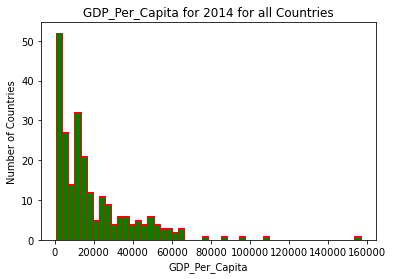

In [19]:
#plt.hist(gdp_2014['GDP_Per_Capita'])
plt.hist(gdp_2014['GDP_Per_Capita'], color="green", edgecolor="red", bins=50)
plt.title("GDP_Per_Capita for 2014 for all Countries")
plt.xlabel("GDP_Per_Capita")
plt.ylabel("Number of Countries")

The shape of the histogram is right skwed. The max value is 155514 and min is 822.
(Width of each bin is = (max value of data – min value of data) / total number of bins)

12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.


In [20]:
gdp_2014.sort_values('GDP_Per_Capita').head(5) 


,Country,GDP_Per_Capita
Year,,
2014,Central African Republic,822.610458
2014,Burundi,886.235777
2014,Malawi,1027.208496
2014,Dem. Rep. Congo,1029.790785
2014,Niger,1127.615541


In [21]:
gdp_2014.sort_values('GDP_Per_Capita', ascending=False).head(5) 

,Country,GDP_Per_Capita
Year,,
2014,"Macao SAR, China",156514.13380
2014,Luxembourg,108760.91600
2014,Qatar,95578.41697
2014,Singapore,87808.66316
2014,Bermuda,77361.10488


#Countries with lowest GDP_Per_Capita in 2014 are Central African Republic, Burundi, Malawi, Dem. Rep. Congo and Niger

#Countries with the highest GDP_Per_Capita in 2014 are Macao SAR China, Luxembourg, Qatar, Singapore and Bermuda

Q13 Now, return to the full dataset, `gdp_df`. Pivot the data for 1990 and 2017 (using the pandas `.pivot_table()` method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named `gdp_pivoted`.


In [22]:
#table_X = gdp_df_for_analysis.pivot_table(values=['GDP_Per_Capita'], index=['Country'],
                    #columns=['Year'])
#table_X.shape

In [23]:
gdp_1990_2017= gdp_df_for_analysis.loc[gdp_df_for_analysis['Year'] .isin ([1990, 2017])]
gdp_1990_2017.shape
gdp_1990_2017.head()

,Country,Year,GDP_Per_Capita
2,Afghanistan,2017,2058.383832
20,Albania,2017,12811.759440
47,Albania,1990,4842.734635
50,Algeria,2017,11737.409350
77,Algeria,1990,8746.352901


In [24]:
gdp_pivoted = gdp_1990_2017.pivot_table(values=['GDP_Per_Capita'], index=['Country'],
                    columns=['Year']).dropna()

#Create the gdp_pivoted df from the .loc df with 1990 and 2017 year and using the .dropna() method to delete the NaN row.

In [25]:
gdp_pivoted.head()

GDP_Per_Capita              
Year                          1990          2017
Country                                         
Albania                4842.734635  12811.759440
Algeria                8746.352901  11737.409350
Angola                 5783.429064   7310.901738
Antigua and Barbuda   15459.551680  19840.076120
Arab World             9694.667544  14555.474920

In [26]:
gdp_pivoted.describe()

GDP_Per_Capita               
Year            1990           2017
count     207.000000     207.000000
mean    12864.259949   20077.401744
std     15417.151065   21032.374294
min       471.325103     773.571858
25%      2852.769874    4808.735294
50%      6892.009069   12637.116950
75%     15272.142035   27625.315430
max    111454.360400  126918.226500

In [27]:
gdp_pivoted.shape
gdp_pivoted.columns


MultiIndex([('GDP_Per_Capita', 1990),
            ('GDP_Per_Capita', 2017)],
           names=[None, 'Year'])

In [28]:
gdp_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, Albania to Zimbabwe
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (GDP_Per_Capita, 1990)  207 non-null    float64
 1   (GDP_Per_Capita, 2017)  207 non-null    float64
dtypes: float64(2)
memory usage: 4.9+ KB


In [29]:
#gdp_pivoted_dropnan = gdp_pivoted.dropna()
#gdp_pivoted_dropnan.shape

Before droping NaN we had 238 rows. There are only 207 countries that started sensex starting 1990. So after the pivot data from 1990 and 2017 we had 238 rows and then dropna leaves ony 207 rows

14. Create a new column in `gdp_pivoted` named `Percent_Change`. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [30]:
gdp_pivoted['Percent_Change'] = 100 *(gdp_pivoted[('GDP_Per_Capita', 2017)] - gdp_pivoted[('GDP_Per_Capita', 1990)])/ gdp_pivoted[('GDP_Per_Capita', 1990)]
gdp_pivoted.head()

GDP_Per_Capita               Percent_Change
Year                          1990          2017               
Country                                                        
Albania                4842.734635  12811.759440     164.556297
Algeria                8746.352901  11737.409350      34.197756
Angola                 5783.429064   7310.901738      26.411194
Antigua and Barbuda   15459.551680  19840.076120      28.335391
Arab World             9694.667544  14555.474920      50.138980

15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [31]:
gdp_pivoted.sort_values("Percent_Change").head(10)

GDP_Per_Capita               Percent_Change
Year                               1990          2017               
Country                                                             
Dem. Rep. Congo             1819.723315   1059.810775     -41.759785
United Arab Emirates      111454.360400  67183.626560     -39.720953
Burundi                     1184.842440    773.571858     -34.710993
Ukraine                    15751.722440  11871.123620     -24.636028
Central African Republic    1201.677234    912.802052     -24.039332
Tajikistan                  3869.043636   3089.530208     -20.147445
Gabon                      18179.265730  15006.764090     -17.451209
Congo                       5115.210903   4274.296414     -16.439488
Madagascar                  1853.051624   1584.422678     -14.496571
Brunei                     71230.862140  60995.681110     -14.369026

In [32]:
gdp_pivoted.sort_values("Percent_Change").tail(10)

GDP_Per_Capita                \
Year                                                  1990          2017   
Country                                                                    
India                                          1809.802205   6185.993893   
Lao PDR                                        1964.572515   7257.807932   
Cabo Verde                                     1748.634028   6643.204610   
Bhutan                                         2784.172630  11142.399950   
Vietnam                                        1673.249634   7155.745829   
East Asia & Pacific (IDA & IBRD)               2196.950288  13123.151790   
East Asia & Pacific (excluding high income)    2173.223895  12986.322230   
Myanmar                                         619.645145   4739.910118   
China                                          1423.896348  14344.421240   
Equatorial Guinea                              1039.985049  22551.083250   

                                            Percent_Change  
Year                                                        
Country                                                     
India                                           241.804971  
Lao PDR                                         269.434464  
Cabo Verde                                      279.908231  
Bhutan                                          300.205067  
Vietnam                                         327.655604  
East Asia & Pacific (IDA & IBRD)                497.334945  
East Asia & Pacific (excluding high income)     497.560254  
Myanmar                                         664.939443  
China                                           907.406281  
Equatorial Guinea                              2068.404562

In [33]:
#Count number of negative value in the Percent change column to find the countries with negative growth
#.value looks for the value in the column
#.fatten converts the column in a array to count the values which are lower than 0 and spots the total count
sum(n < 0 for n in gdp_pivoted['Percent_Change'].values.flatten())

17

**Out of the 207 countries, 17 countries experinsed the neagtice growth in GDP from 1990 to 2017, with Demo. Rep. Congo being the most and UAE the second country with the highest drop in GDP**

#### 16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?  **Bonus:** Put both line charts on the same plot.


**Equatorial Guinea has the highest GDP_growth of 2068%. Followed by China in second place with 907% incraese in GDP_Per_Capita**

<AxesSubplot:>

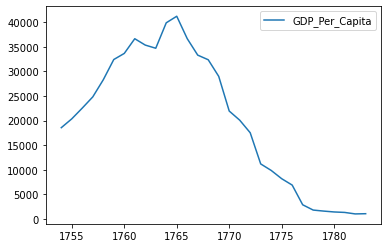

In [34]:
#to plot the line plot for Equatorial Guinea GDP_Per_Capita for all years.


gdp_df_for_analysis.loc[gdp_df_for_analysis['Country'] == "Equatorial Guinea"].plot(y='GDP_Per_Capita')

#I see the graph but I want x-axis to be 'Year' and y-axis to be 'GDP_Per_Capita' not sure what is the x-axis hear.

<AxesSubplot:title={'center':'Equatorial Guinea'}, xlabel='Year', ylabel='GDP_Per_Capita'>

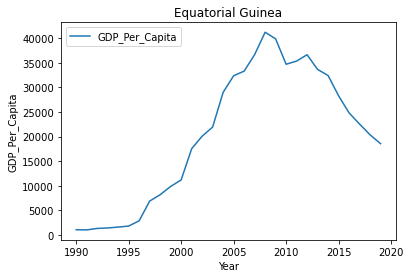

In [35]:
#using plt.plot function
#finding row number for the Equatorial Guinea
gdp_df_for_analysis.index[gdp_df_for_analysis['Country']=="Equatorial Guinea"].tolist()
#gdp_df_for_analysis.iloc[1754:1783].plot(x='Year', y='GDP_Per_Capita')

gdp_df_for_analysis.iloc[gdp_df_for_analysis.index[gdp_df_for_analysis['Country']=="Equatorial Guinea"]].plot(x='Year', y='GDP_Per_Capita', title= "Equatorial Guinea", xlabel="Year", ylabel="GDP_Per_Capita")


#Here we got the x-axis to be 'Year' and y-axis to be 'GDP_Per_Capita' not sure what is the x-axis hear.


<AxesSubplot:title={'center':'China'}, xlabel='Year', ylabel='GDP_Per_Capita'>

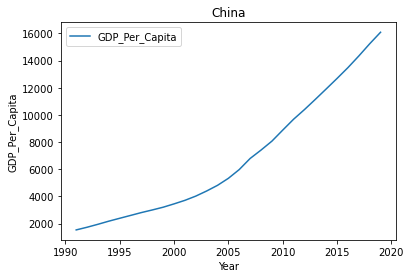

In [36]:
gdp_df_for_analysis.index[gdp_df_for_analysis['Country']=="China"].tolist()

gdp_df_for_analysis.iloc[1162:1191].plot(x='Year', y='GDP_Per_Capita', title= "China", xlabel="Year", ylabel="GDP_Per_Capita")



In [37]:
#To get both on the same graph subseting the values and making one df and than changing the index to country and than transposing the rows.
gdp_EG_China = gdp_df_for_analysis.loc[gdp_df_for_analysis['Country'].isin(["Equatorial Guinea", "China"])]
gdp_EG_China.head()
gdp_EG_China.columns
#gdp_EG_China.set_index("Country")



Index(['Country', 'Year', 'GDP_Per_Capita'], dtype='object')

<AxesSubplot:title={'center':'Country'}, xlabel='Year', ylabel='GDP_Per_Capita'>

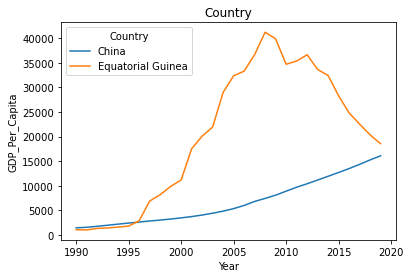

In [38]:
EG_China = gdp_EG_China.pivot(index='Year', columns='Country', values='GDP_Per_Capita')
EG_China.head()
#EG_China.plot(title = "Countries with hhighest GDP_Growth", xlabel: "Year", ylabel: "GDP_Per_Capita")
EG_China.plot(title= "Country", xlabel="Year", ylabel="GDP_Per_Capita")


### 17. Read in continents.csv contained in the `data` folder into a new dataframe called `continents`. We will be using this dataframe to add a new column to our dataset.

In [39]:

continents = pd.read_csv("../data/continents.csv")
continents.head()
continents.shape
continents.columns
#continents.head()

Index(['Continent', 'Country'], dtype='object')

In [40]:
gdp_df_for_analysis.shape
gdp_df_for_analysis.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904


### 18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.


In [41]:
gdp_df_merged = pd.merge(left = gdp_df_for_analysis, 
         right = continents, how = 'inner', on= 'Country') 
         
gdp_df_merged.info()
gdp_df_merged.shape
gdp_df_merged.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5443 entries, 0 to 5442
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         5443 non-null   object 
 1   Year            5443 non-null   int64  
 2   GDP_Per_Capita  5443 non-null   float64
 3   Continent       5443 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 212.6+ KB


,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2019,2065.036398,Asia
1,Afghanistan,2018,2033.779002,Asia
2,Afghanistan,2017,2058.383832,Asia
3,Afghanistan,2016,2057.062164,Asia
4,Afghanistan,2015,2068.265904,Asia


### 19. Determine the number of countries per continent. Create a bar chart showing this.



In [42]:
#gdp_df_merged['Continent'].nunique()

<AxesSubplot:title={'center':'Countries_Per_Continent'}, ylabel='Number of Countries'>

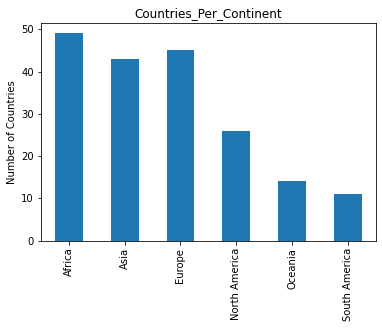

In [43]:
gdp_df_merged.groupby('Continent')['Country'].nunique().plot(kind="bar", title = 'Countries_Per_Continent', xlabel='', ylabel='Number of Countries')

## 20. Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

Continent
Africa           AxesSubplot(0.125,0.125;0.775x0.755)
Asia             AxesSubplot(0.125,0.125;0.775x0.755)
Europe           AxesSubplot(0.125,0.125;0.775x0.755)
North America    AxesSubplot(0.125,0.125;0.775x0.755)
Oceania          AxesSubplot(0.125,0.125;0.775x0.755)
South America    AxesSubplot(0.125,0.125;0.775x0.755)
Name: GDP_Per_Capita, dtype: object

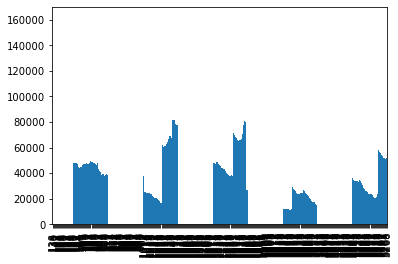

In [49]:
#scratch work
gdp_df_merged.groupby('Continent')['GDP_Per_Capita'].plot(kind='bar')
#, x="Continent", y="GDP_Per_Capita", hue="smoker")

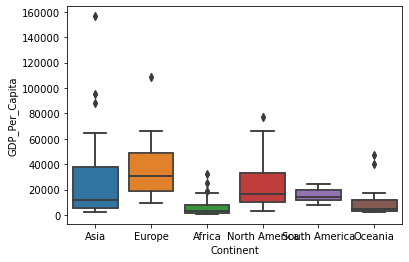

In [122]:
#Scratch work
import seaborn as sns
#gdp_df_merged(gdp_df_merged.loc[gdp_df_merged['Year']== 2014]).groupby('Continent')['GDP_Per_Capita'].plot()
df_merged_2014 = gdp_df_merged.loc[gdp_df_merged['Year']== 2014]
df_merged_2014.shape

sns.boxplot(data = df_merged_2014, x='Continent', y='GDP_Per_Capita');

sns.boxplot(data = gdp_df_merged.loc[gdp_df_merged['Year']== 2014], x='Continent', y='GDP_Per_Capita');

#df_merged_2014.groupby('Continent')['GDP_Per_Capita'].nunique().plot(kind="bar", title = '2014_GDP_Per_Continent', xlabel='', ylabel='GDP_Per_capita'')
#sns.boxplot(data=df[["age", "fare"]], orient="h")

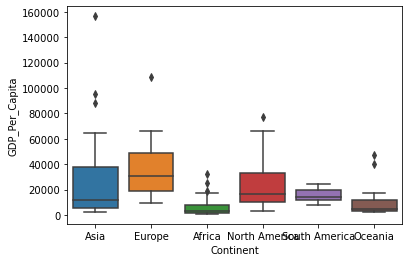

In [53]:
sns.boxplot(data = gdp_df_merged.loc[gdp_df_merged['Year']== 2014], 
            x='Continent', y='GDP_Per_Capita');

#### 21. Download the full csv containing Life expectancy at birth, total (years) from [https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false). Read this data into a DataFrame named `life_expectancy`.


In [77]:
life_expectancy_a = pd.read_csv('../data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_4558314.csv', 
                              skiprows = 4)
life_expectancy_a.shape #(266, 67)

life_expectancy_a.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Unnamed: 66'],
      dtype='object')

#### 22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use `.melt()` to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to `Country`, `Year`, and `Life_Expectancy`.


In [78]:
#Scratch work to drop the columns
le = life_expectancy_a.drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code'])
le.head(2)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,65.662000,66.074000,66.44400,66.787000,67.113000,67.435000,67.762000,68.095000,68.436000,...,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000,76.434000,NaN,NaN
1,Africa Eastern and Southern,42.716053,43.166935,43.60399,44.025617,44.432721,44.826919,45.213048,45.594294,45.974059,...,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005213,64.325702,NaN,NaN


In [89]:
lemelt = pd.melt(life_expectancy_a.drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code']), id_vars=['Country Name'], value_vars=['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
lemelt.head(2)

,Country Name,variable,value
0,Aruba,1960,65.662000
1,Africa Eastern and Southern,1960,42.716053


In [117]:
#renaming the column names and saving the data as life_expectancy
life_expectancy = lemelt.rename(columns={"Country Name": "Country", "variable": "Year", "value": "Life_Expectancy"}, errors="raise")

#inspection
life_expectancy.head(2)
life_expectancy.tail(2)
life_expectancy['Country'].value_counts() #266 countries
life_expectancy['Year'].value_counts() #62 counts
life_expectancy.describe()
life_expectancy.shape #(16492, 3)
life_expectancy.head(2)

,Country,Year,Life_Expectancy
0,Aruba,1960,65.662000
1,Africa Eastern and Southern,1960,42.716053


#### 23. What was the first country with a life expectancy to exceed 80?


In [95]:
#df[df['cloname']>80]

life_expectancy[life_expectancy['Life_Expectancy']>80].sort_values('Year').head(10)

,Country,Year,Life_Expectancy
9695,Japan,1996,80.200244
9938,"Hong Kong SAR, China",1997,80.126829
9961,Japan,1997,80.424146
10204,"Hong Kong SAR, China",1998,80.131707
10227,Japan,1998,80.501463
10470,"Hong Kong SAR, China",1999,80.382927
10493,Japan,1999,80.570732
10520,"Macao SAR, China",1999,80.150000
10786,"Macao SAR, China",2000,80.407000
10759,Japan,2000,81.076098


#### Japan was the first country to exceed life expectancy above 80 in 1996, followed by China in 1997

#### 24. Merge `gdp_per_capita` and `life_expectancy`, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named `gdp_le`. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.


In [123]:
gdp_df_merged.info()
life_expectancy.info()
life_expectancy['Year'] = life_expectancy['Year'].astype(int)
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5443 entries, 0 to 5442
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         5443 non-null   object 
 1   Year            5443 non-null   int64  
 2   GDP_Per_Capita  5443 non-null   float64
 3   Continent       5443 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 212.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16492 entries, 0 to 16491
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          16492 non-null  object 
 1   Year             16492 non-null  int32  
 2   Life_Expectancy  14858 non-null  float64
dtypes: float64(1), int32(1), object(1)
memory usage: 322.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16492 entries, 0 to 16491
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
--- 

In [131]:
gdp_le = pd.merge(left = gdp_df_merged, 
         right = life_expectancy, how = 'outer', on= ['Country', 'Year'])
gdp_le.head(5)
gdp_le.tail()
gdp_le.shape #16821, 5
gdp_le.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16821 entries, 0 to 16820
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          16821 non-null  object 
 1   Year             16821 non-null  int64  
 2   GDP_Per_Capita   5443 non-null   float64
 3   Continent        5443 non-null   object 
 4   Life_Expectancy  14858 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 788.5+ KB


#### 25. Create a new DataFrame, named `gdp_le_2019` by extracting data for the year 2019 from `gdp_le`. How many countries have a life expectancy of at least 80 in 2019?


In [142]:
gdp_le_2019 = gdp_le.loc[gdp_le['Year'] == 2019]
gdp_le_2019.shape #276,5
gdp_le_2019[gdp_le_2019['Life_Expectancy']>=80].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 226 to 16261
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          43 non-null     object 
 1   Year             43 non-null     int64  
 2   GDP_Per_Capita   33 non-null     float64
 3   Continent        33 non-null     object 
 4   Life_Expectancy  43 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.0+ KB


#### 43 countries have the expectany equall to or above 80 in 2019

#### 26. Find the countries that had the top 3 largest GDP per capita figures for 2019. Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.


In [148]:
gdp_le_2019.sort_values('GDP_Per_Capita', ascending=False)

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
2856,"Macao SAR, China",2019,123965.28640,Asia,84.244000
2826,Luxembourg,2019,114304.04420,Europe,82.639024
4290,Singapore,2019,97341.46865,Asia,83.595122
3983,Qatar,2019,90043.92618,Asia,80.227000
2270,Ireland,2019,86826.33510,Europe,82.702439
...,...,...,...,...,...
16284,"Venezuela, RB",2019,NaN,NaN,72.064000
16285,British Virgin Islands,2019,NaN,NaN,NaN
16286,Virgin Islands (U.S.),2019,NaN,NaN,79.668293
16287,World,2019,NaN,NaN,72.763223


#### Macao SAR, China; Luxembourg; Singapore with highest GDP_Per_Capita in 2019

In [149]:
#Scratch work
#Subsetting the df for top three countries
gdp_le[(gdp_le['Country'].isin(['Macao SAR, China', 'Luxembourg', 'Singapore']))]

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
2826,Luxembourg,2019,114304.0442,Europe,82.639024
2827,Luxembourg,2018,113952.3579,Europe,82.295122
2828,Luxembourg,2017,112666.7694,Europe,82.095122
2829,Luxembourg,2016,113396.7538,Europe,82.685366
2830,Luxembourg,2015,110798.7362,Europe,82.292683
...,...,...,...,...,...
16435,"Macao SAR, China",2020,NaN,NaN,84.370000
16497,Singapore,2020,NaN,NaN,83.743902
16699,Luxembourg,2021,NaN,NaN,NaN
16701,"Macao SAR, China",2021,NaN,NaN,NaN


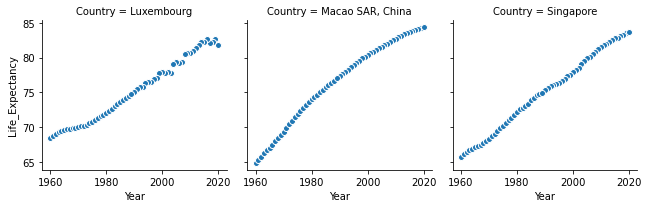

In [152]:
# Form a facetgrid using columns with a hue
graph = sns.FacetGrid(gdp_le[(gdp_le['Country'].isin(['Macao SAR, China', 'Luxembourg', 'Singapore']))],
                      col ="Country")
# map the above form facetgrid with some attributes
graph.map(plt.scatter, "Year", "Life_Expectancy", edgecolor ="w").add_legend()
# show the object
plt.show()

#### 27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2019. What do you notice?

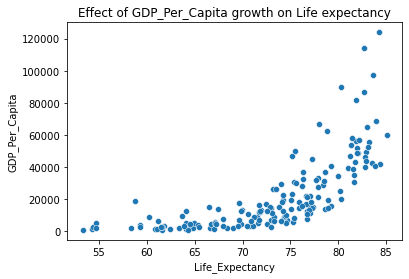

In [163]:
fig = sns.scatterplot(data=gdp_le_2019, x="Life_Expectancy", y="GDP_Per_Capita")
               
plt.title("Effect of GDP_Per_Capita growth on Life expectancy")
plt.show(fig)


#### Looking at the scatter plot it shows that the incraese in GDP_Per_Capita directly affects the Life_expectancy. Life expectancy increases as the GDP_Per_Capita increases

#### 28. Find the correlation between Life Expectancy and GDP per Capita for the year 2019. What is the meaning of this number?


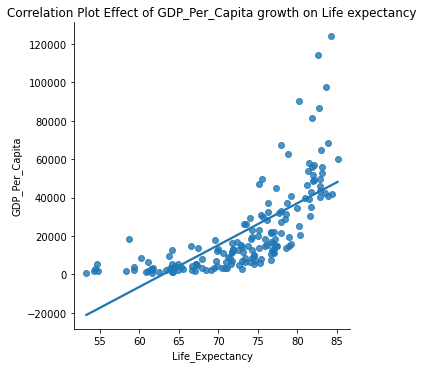

In [165]:
fig2 = sns.lmplot(data=gdp_le_2019, x="Life_Expectancy", y="GDP_Per_Capita", ci=None)
               
plt.title("Correlation Plot Effect of GDP_Per_Capita growth on Life expectancy")
plt.show(fig2)


In [166]:
gdp_le_2019['GDP_Per_Capita'].corr(gdp_le_2019['Life_Expectancy'])

0.7090182746167396

#### The two variable GDP_Per_Capita and Life Expectancy have a high magnitude of positive relationship

#### 29. Add a column to `gdp_le_2019` and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.
